In [ ]:
import pandas as pd

## 数据载入

载入以下数据集：

* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-cpu.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-ens33.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-mem.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-cpu.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-ens33.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-mem.txt

创建一个函数载入数据

In [ ]:
def load_sysstat_dataset(url):
  df = pd.read_table(
    url,
    sep='\s+',
    skiprows=2,
  )
  return df

In [ ]:
loaded = load_sysstat_dataset('https://github.com/genzj/data-analysis-course/raw/main/data/ch-04/sysstat-20210815-020609-cpu.txt')
print(loaded.dtypes)
loaded.head()

02:06:09     object
AM           object
CPU          object
%user       float64
%nice       float64
%system     float64
%iowait     float64
%steal      float64
%idle       float64
dtype: object


,02:06:09,AM,CPU,%user,%nice,%system,%iowait,%steal,%idle
0,02:06:14,AM,all,0.20,0.0,0.20,0.0,0.0,99.60
1,02:06:19,AM,all,0.00,0.0,0.00,0.0,0.0,100.00
2,02:06:24,AM,all,0.20,0.0,0.20,0.0,0.0,99.60
3,02:06:29,AM,all,0.81,0.0,0.81,0.0,0.0,98.37
4,02:06:34,AM,all,0.20,0.0,0.61,0.2,0.0,98.99


## 转换为时间戳类型

注意到第一列是时间戳，第二列是AM/PM标志，但目前是以string类型来载入的。编写函数`load_timestamp_sysstat`，实现以下功能：

* 读取数据（已写好）
* 将数据第0列和第1列拼接到一起，形成完整的时间戳
* 使用`pd.to_datetime`解析时间戳，注意指定时间格式（已写好）到`format`参数
* 将解析好的时间戳设置为数据的index
* 丢弃原数据的第0和第1列（解析前的时间字符串）

In [ ]:
def load_timestamp_sysstat(url):
  timeformat = '%I:%M:%S %p'
  df = load_sysstat_dataset(url)
  timestr = 
  return 

# 测试
load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-cpu.txt').head()

用新函数载入所有数据

In [ ]:
cpu_1 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-cpu.txt')
mem_1 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-mem.txt')
net_1 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-ens33.txt')
cpu_2 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-cpu.txt')
mem_2 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-mem.txt')
net_2 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-ens33.txt')

## 数据拼接

### 纵向拼接：

* 把cpu_1和cpu_2拼接为cpu
* 把mem_1和mem_2拼接为mem
* 把net_1和net_2拼接为net


In [ ]:
cpu = 
mem = 
net = 

### 横向拼接：

将cpu、mem、net拼接为一个名为ans的大表。

方法一：用concat拼接，参数axis='columns'，但需要处理缺失值

In [ ]:
ans = 

# 检查是否有缺失数据
print('data with NaN:', ans.isna().any(axis=1).sum())

ans.head()

方法二：用merge拼接（使用默认的内连接），无需处理缺失，但需要调用两次

In [ ]:
ans = 

ans =

ans.head()

## 降采样

* 按每1分钟的时间间隔对数据进行降采样
* 取出每分钟的最大值、平均值

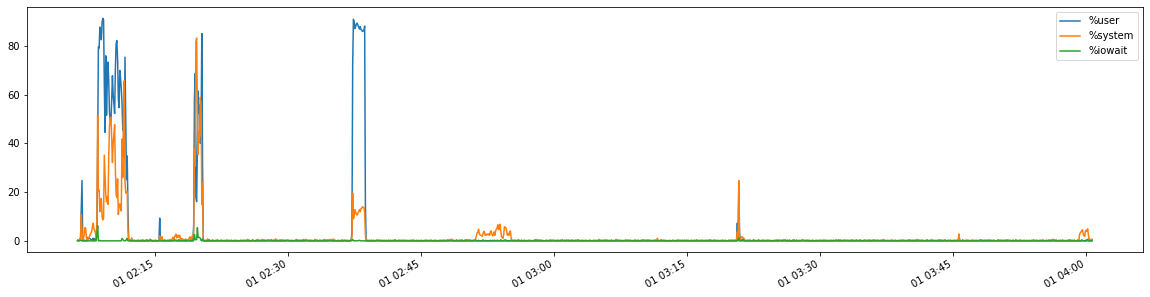

In [ ]:
# 降采样前的原始数据
ans[['%user', '%system', '%iowait']].plot(figsize=(20, 5))

In [ ]:
resampled_by_1min = 
aggregated_by_resampling = resampled_by_1min.

# 绘图以便对比原始数据
aggregated_by_resampling[['%user', '%system', '%iowait']].plot(figsize=(20, 5))

## 滚动

* 按每1分钟的窗口大小，对数据取滚动平均值和滚动最大值

In [ ]:
rolling_by_1min = 
aggregated_by_rolling = rolling_by_1min.

# 绘图以便对比原始数据
aggregated_by_rolling[['%user', '%system', '%iowait']].plot(figsize=(20, 5))